# Example Stitching Notebook

In [1]:
import os
from sparcstools.parse import parse_phenix
from sparcstools.stitch import generate_stitched

In [ ]:
input_dir = os.path.join("../../../test_data/example1/raw_image_tiles/")
slidename = "stitching_test"
outdir = os.path.join("../../../test_data/example1/", slidename)

In [ ]:
overlap = 0.1 #adjust in case your data was aquired with another overlap
row = str(2).zfill(2) #specify the row of the well you want to stitch
well = str(4).zfill(2) #specifc the well number you wish to stitch
zstack_value = str(1).zfill(3) #specify the zstack you want to stitch. for multiple zstacks please make a loop and iterate through each of them.
timepoint = str(1).zfill(3) #specifz the timepoint you wish to stitch

#define on which channel should be stitched
stitching_channel = "Alexa488"
output_filetype = [".tif", "ome.zarr"] #one of .tif, .ome.tif, .ome.zarr (can pass several if you want to generate all filetypes)

#adjust cropping parameter
crop = {'top':0, 'bottom':0, 'left':0, 'right':0}  #this does no cropping

#create output directory if it does not exist
if not os.path.exists(outdir):
    os.makedirs(outdir)

pattern = f"Timepoint{timepoint}_Row{row}_Well{well}_{{channel}}_zstack{zstack_value}_r{{row:03}}_c{{col:03}}.tif"

generate_stitched(input_dir, 
                slidename,
                pattern,
                outdir,
                overlap,
                crop = crop ,
                stitching_channel = stitching_channel, 
                filetype = output_filetype, 
                rescale_range = {"Alexa488":(1, 30), "DAPI":(1, 99), "mCherry":(1, 99)}, 
                plot_QC = True)



## Visualize Stitching Output

(-0.5, 3037.5, 3039.5, -0.5)

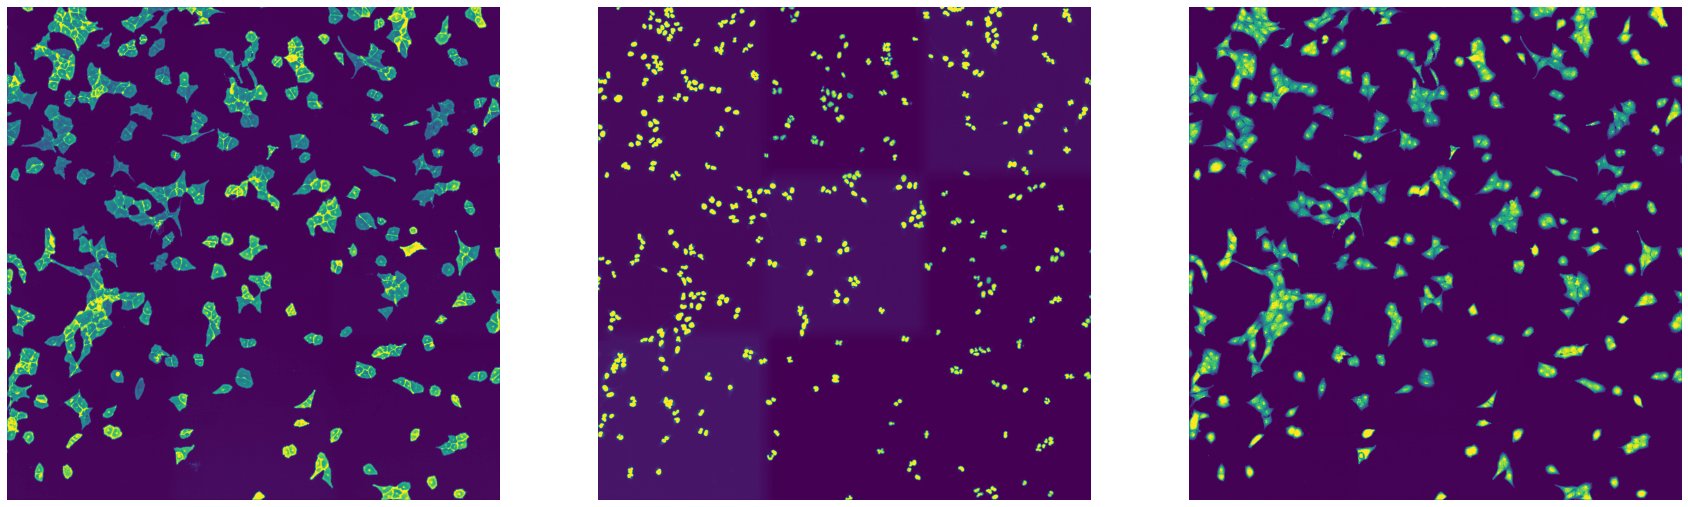

In [14]:
import matplotlib.pyplot as plt
from tifffile import imread

fig, axs = plt.subplots(1, 3, figsize = (30, 10))
axs[0].imshow(imread(f"{outdir}/stitching_test_Alexa488.tif"))
axs[0].axis("off")

axs[1].imshow(imread(f"{outdir}/stitching_test_DAPI.tif"))
axs[1].axis("off")

axs[2].imshow(imread(f"{outdir}/stitching_test_mCherry.tif"))
axs[2].axis("off")